In [4]:
from functions import *
import matplotlib.pyplot as plt

In [26]:
#functions
#recombination to ionisation ratio
@jit(nopython=True)
def ratio_ba(z):
    return (m*Temp(z)/(2*pi*hbar**2))**1.5*np.exp(-B/(4*Temp(z))) 
#Lyman to 2S decay ratio
nu_a = 3*B/4/planck
@jit(nopython=True)
def emi_ratio(z):
    K = c**3/(8*pi*nu_a**3*Hubble(z))
    return 1/(Lambda*ng(z)*eta*K)

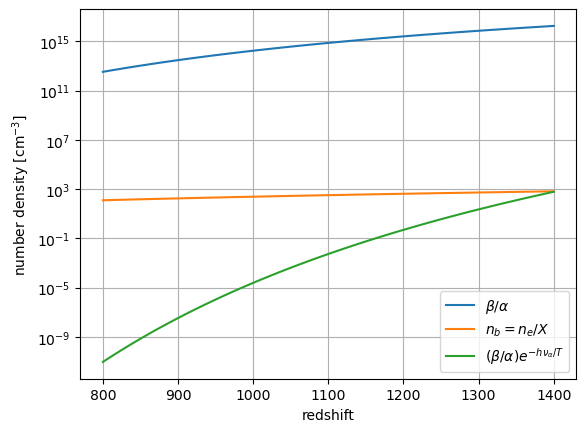

In [43]:
#plot of recombination to ionisation ratio
#>> n_e means ionisation is dominant
#<< n_e means recombination is dominant
z = np.linspace(800, 1400)
T = Temp(z)/kb
y = ratio_ba(z)
exp = y*np.exp(-3*B/(4*Temp(z)))
nb = eta*ng(z)
plt.plot(z, y, label='$\\beta/\\alpha$')
plt.plot(z, nb, label='$n_b = n_e/X$')
plt.plot(z, exp, label='$(\\beta/\\alpha) e^{-h\\nu_{\\alpha}/T}$')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('number density [$\\mathrm{cm}^{-3}$]')
#plt.xlabel('temperature [K]')
plt.xlabel('redshift')
plt.legend()
plt.grid()
plt.savefig('Images/recomb to ion ratio.png', dpi=300)
plt.show()

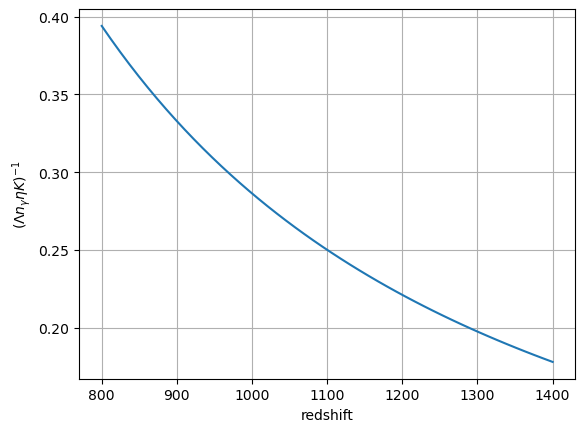

In [45]:
r = emi_ratio(z)
plt.plot(z,r)
plt.ylabel('$(\\Lambda n_{\\gamma}\\eta K)^{-1}$')
#plt.xlabel('Temperature [erg]')
plt.xlabel('redshift')
plt.grid()
plt.savefig('Images/deexcitation ratio.png', dpi=300)
plt.show()